In [1]:
from sampler import Sampler
import numpy as np
import matplotlib.pyplot as plt
import time

plt.rcParams['figure.figsize'] = [20, 10]

## 1. Run the sampler on a small perfect simulation
No noise, no perturbations, and no gain offsets.

In [2]:
sampler1 = Sampler(seed=99, niter=10000, random_the_long_way=False)
sampler1.load_sim(3, x_sigma=0)
S = np.eye(sampler1.nant()*2-1)*0.01
V_mean = sampler1.vis_sim.V_model
Cv = np.eye(V_mean.size*2)
sampler1.set_S_and_V_prior(S, V_mean, Cv)
sampler1.run()
# Do a perfect non-red sim and 10 ants

Running sampling


### Plot the correlation matrix, only where values are highly correlated

Blue is correlated, red is anti-correlated.

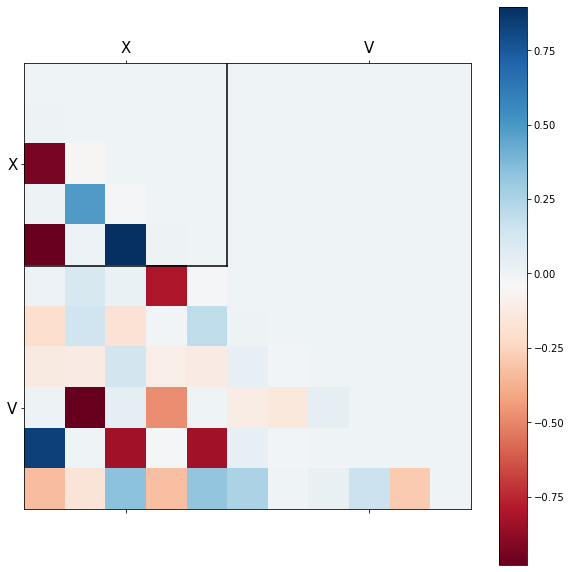

In [3]:
sampler1.plot_covcorr(threshold=0.0)

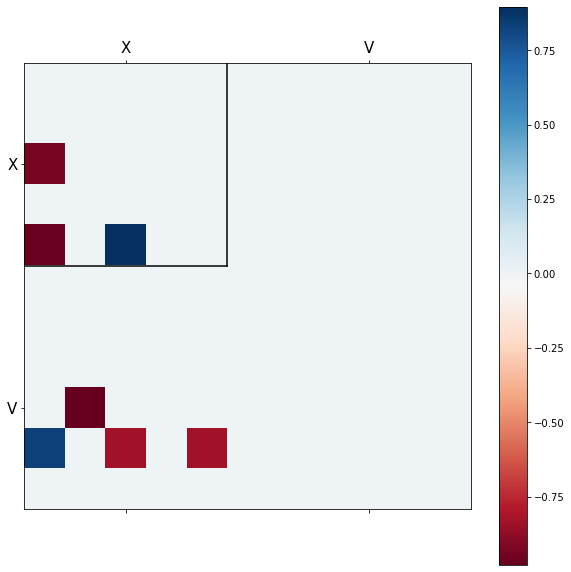

In [4]:
sampler1.plot_covcorr(threshold=0.8)    # Threshold means only plot correlations that have abs(correlation)>threshold

### Plot the corner plot

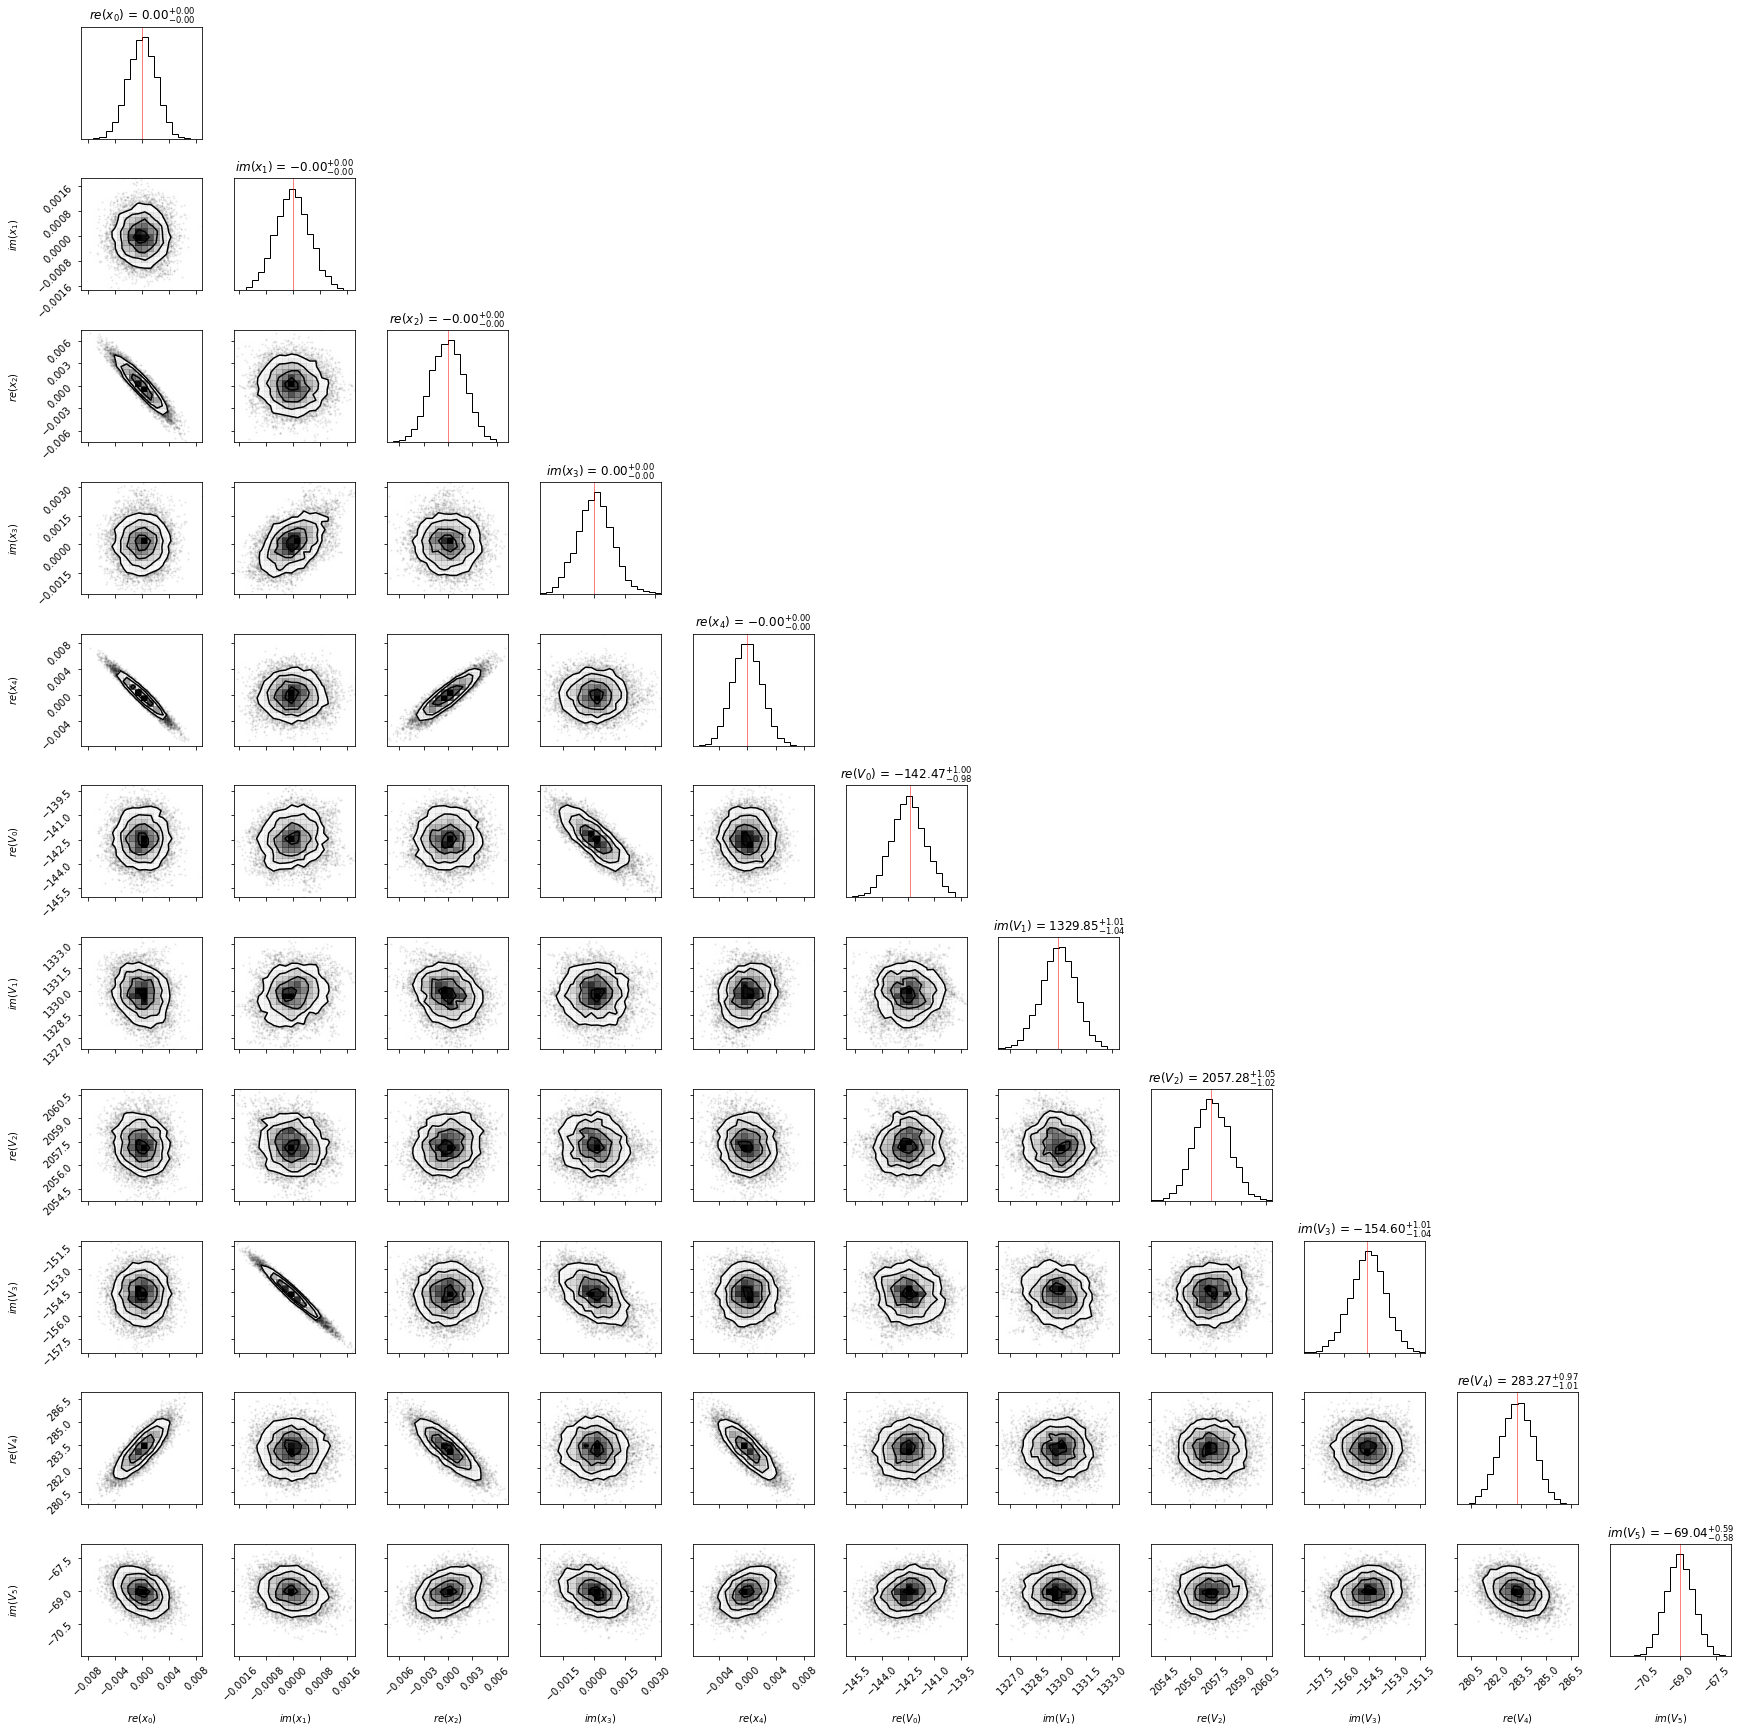

In [5]:
sampler1.plot_corner()
# Color code the x and V to distinguish


### Plot the calibrated visibilites against the true visibilities

The true visibibilities are what I call the "model" V generated by the first step of the non-redundant pipeline before gains/noise are applied.

The calibrated visibilities are obtained by dividing the observed visibilities by the baseline gains from calibration and sampling:  d/[g(1+x)]. There are two sets of 
calibrated visibilities:
1. From redcal. There are no x values
2. From sampling. There are x values as well as gains.

The true visibilities are on the x-axis and the calibrated visibility is on the y-axis. There are three lines plotted
1. A line that has slope 1 (1:1) as a guide.
2. From redcal.
3. From sampling.

They are in different colours but we'll find that they are all on top of each other.

There 2 plots - one for amplitude and one for phase.


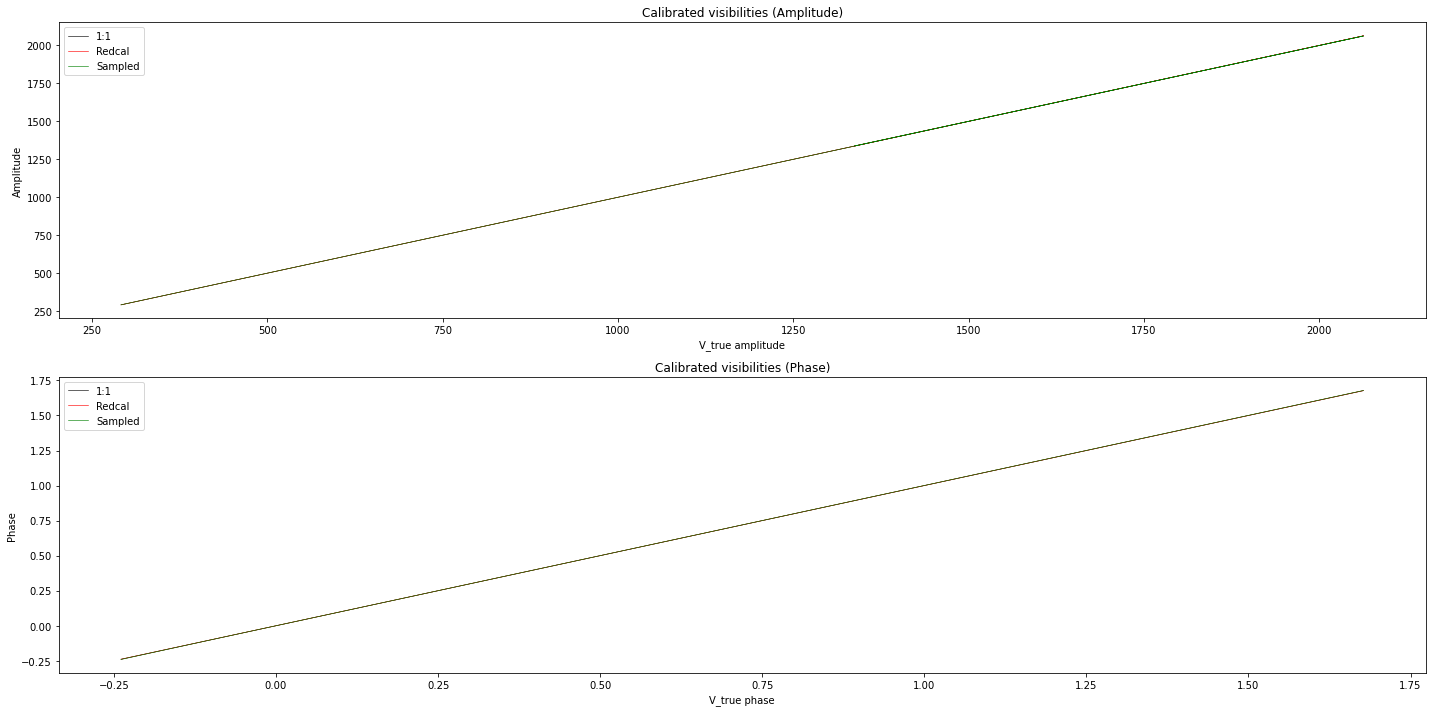

In [6]:
sampler1.plot_results()

## 2. Use a sim from the non-redundant pipeline, but redundancy is not enforced in the sampling

The redundancy is removed by putting every baseline into its own redundant group

In [7]:
sampler2 = Sampler(seed=99, niter=10000, random_the_long_way=False)
sampler2.load_nr_sim("/scratch2/users/hgarsden/catall/calibration_points/viscatBC_stretch0.02", 
                    freq=9, time=9, remove_redundancy=True, initial_solve_for_x=False)

S = np.eye(sampler2.nant()*2-1)*0.01
V_mean = sampler2.vis_sim.V_model
# Try V_obs/g_redcal for V_mean
Cv = np.eye(V_mean.size*2)
sampler2.set_S_and_V_prior(S, V_mean, Cv)
start_time = time.time()
sampler2.run()
print("Run time", (time.time()-start_time)/60, "minutes")

Loading NR sim from /scratch2/users/hgarsden/catall/calibration_points/viscatBC_stretch0.02
Get V_obs from /scratch2/users/hgarsden/catall/calibration_points/viscatBC_stretch0.02_g.uvh5


Telescope hera_sim is not in known_telescopes.


Get model from /scratch2/users/hgarsden/catall/calibration_points/viscatBC_stretch0.02_g_cal_dict.npz
Get noise from /scratch2/users/hgarsden/catall/calibration_points/viscatBC_stretch0.02_nn.uvh5


Telescope hera_sim is not in known_telescopes.
telescope_location is not set. Using known values for HERA.
antenna_positions is not set. Using known values for HERA.
Telescope hera_sim is not in known_telescopes.
telescope_location is not set. Using known values for HERA.
antenna_positions is not set. Using known values for HERA.
Telescope hera_sim is not in known_telescopes.


Get gains from /scratch2/users/hgarsden/catall/calibration_points/viscatBC_stretch0.02_g_new.calfits
Get true model from /scratch2/users/hgarsden/catall/calibration_points/viscatBC_stretch0.02.uvh5
Get true gains from /scratch2/users/hgarsden/catall/calibration_points/viscatBC_stretch0.02.calfits
Get V_obs from /scratch2/users/hgarsden/catall/calibration_points/viscatBC_stretch0.02_g.uvh5
Running sampling
Run time 0.8858808000882467 minutes


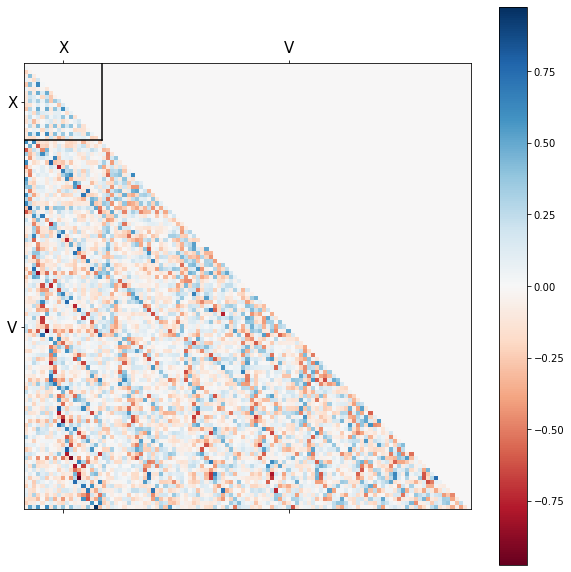

In [8]:
sampler2.plot_covcorr(threshold=0.0)
# Also plot like this but the means 

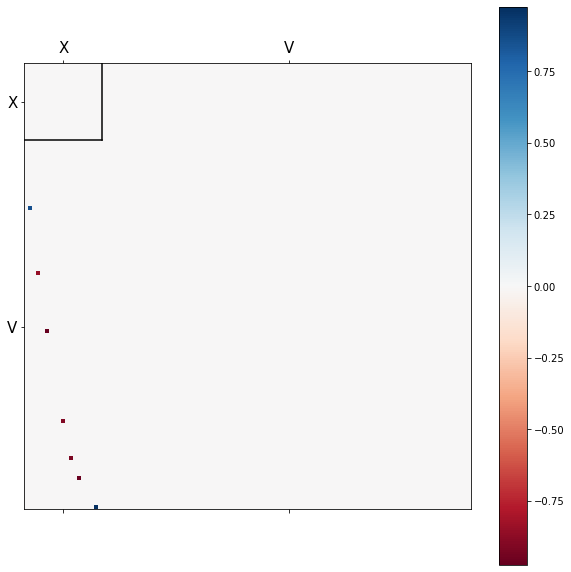

In [9]:
sampler2.plot_covcorr(threshold=0.8)

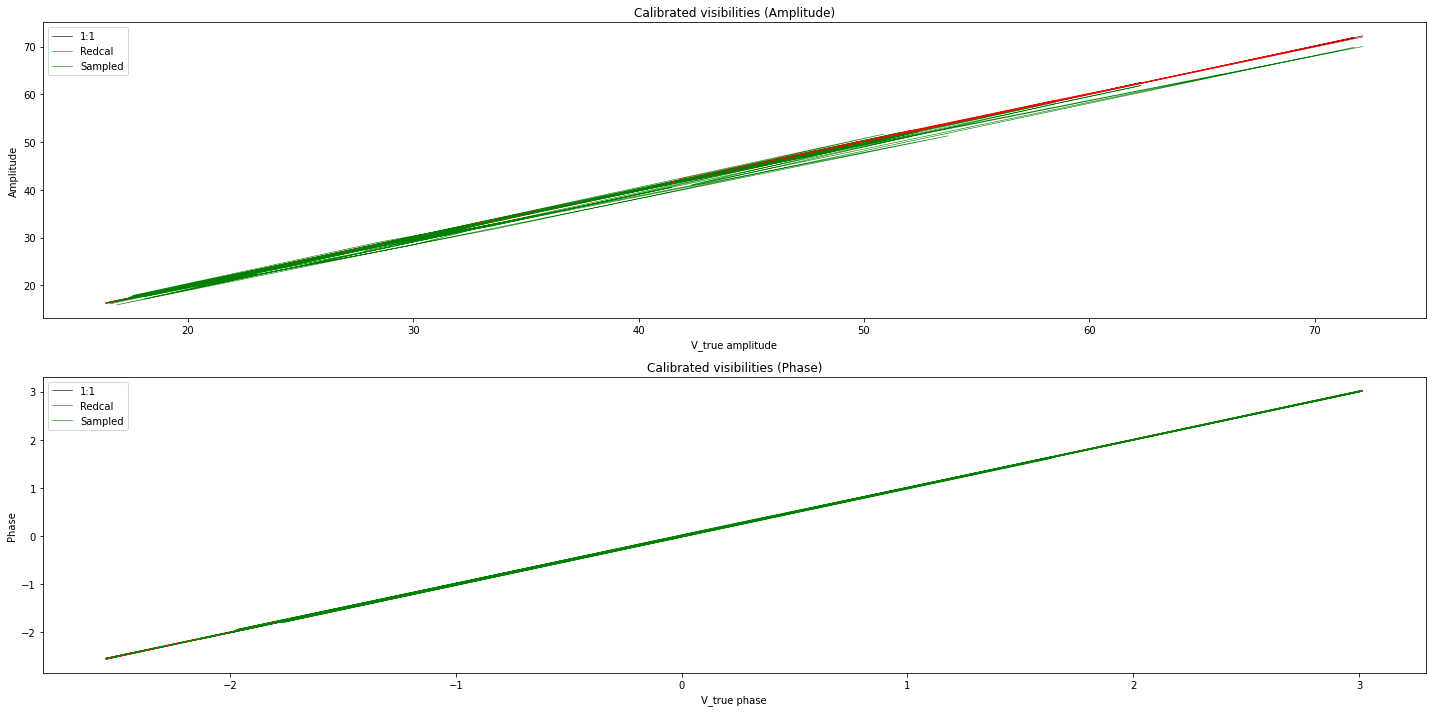

In [10]:
sampler2.plot_results()

### Plot gains

There are 3 sets:
1. g_true. There are no x offsets
2. g_redcal. There are no x offsets
3. g_sampled. There are x offsets. The maximum likelihood x offsets from the sampling are used. The x offsets are applied to the redcal gains: g = g_bar(1+x).

Two plots - amplitude and phase. Error bars are on the sampled results based on 3-sigma.

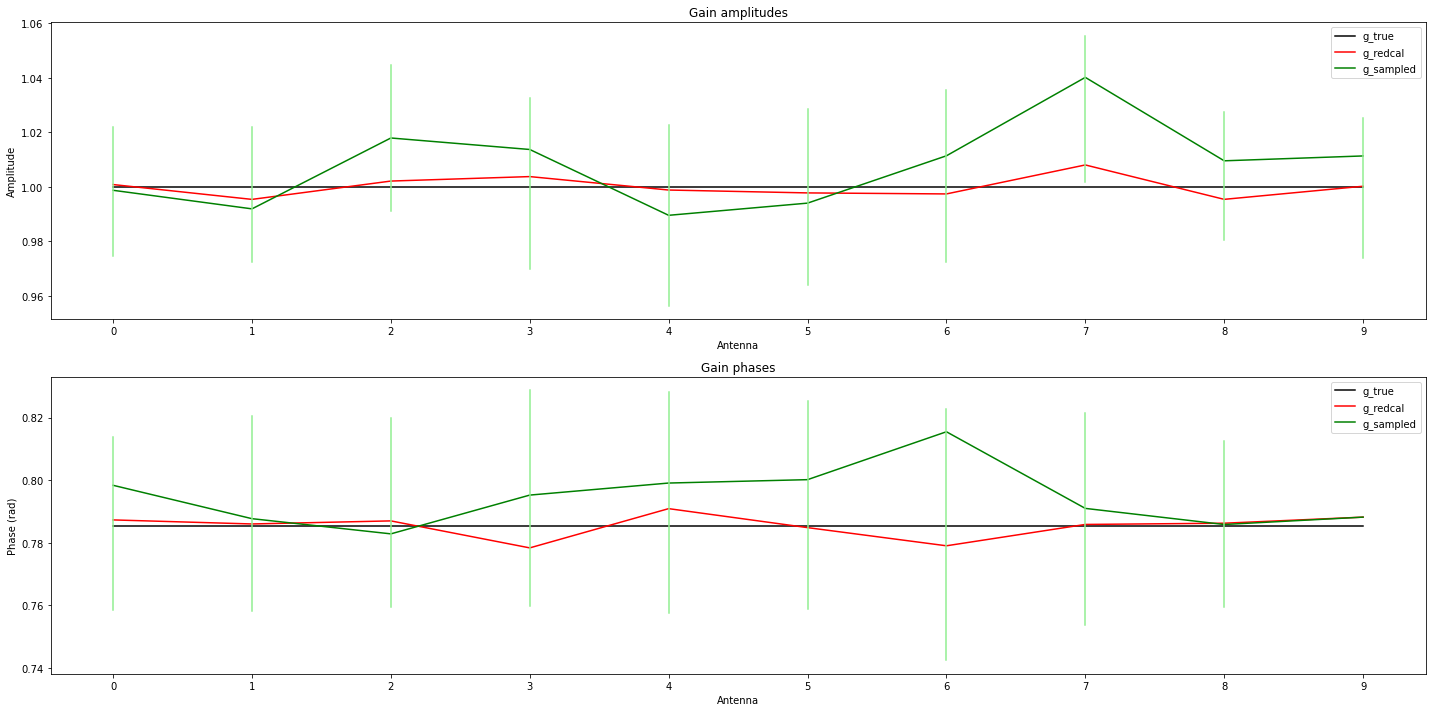

In [11]:
sampler2.plot_gains()
# Don't use the degeneracy fix in the non-redundant pipeline after redcal. But then apply them after the sampler (can look at results
# with/without.
# Add the chi2 best solution.

## 3. Use the same sim as in 2., but force redundancy in sampling

This means there are fewer model V values fitted. The number of V values is the number of redundant groups not the number of baselines.

In [11]:
sampler3 = Sampler(seed=99, niter=10000, random_the_long_way=False)
sampler3.load_nr_sim("/scratch2/users/hgarsden/catall/calibration_points/viscatBC_stretch0.02", 
                    time=9, freq=9, remove_redundancy=False, initial_solve_for_x=False)

S = np.eye(sampler3.nant()*2-1)*0.01
V_mean = sampler3.vis_sim.V_model
Cv = np.eye(V_mean.size*2)
sampler3.set_S_and_V_prior(S, V_mean, Cv)
start_time = time.time()
sampler3.run()
print("Run time", (time.time()-start_time)/60, "minutes")

Loading NR sim from /scratch2/users/hgarsden/catall/calibration_points/viscatBC_stretch0.02
Get V_obs from /scratch2/users/hgarsden/catall/calibration_points/viscatBC_stretch0.02_g.uvh5
Get model from /scratch2/users/hgarsden/catall/calibration_points/viscatBC_stretch0.02_g_cal_dict.npz


Telescope hera_sim is not in known_telescopes.


Get noise from /scratch2/users/hgarsden/catall/calibration_points/viscatBC_stretch0.02_nn.uvh5
Get gains from /scratch2/users/hgarsden/catall/calibration_points/viscatBC_stretch0.02_g_new.calfits
Get true model from /scratch2/users/hgarsden/catall/calibration_points/viscatBC_stretch0.02.uvh5
Get true gains from /scratch2/users/hgarsden/catall/calibration_points/viscatBC_stretch0.02.calfits
Get V_obs from /scratch2/users/hgarsden/catall/calibration_points/viscatBC_stretch0.02_g.uvh5
Running sampling


Telescope hera_sim is not in known_telescopes.
telescope_location is not set. Using known values for HERA.
antenna_positions is not set. Using known values for HERA.
Telescope hera_sim is not in known_telescopes.
telescope_location is not set. Using known values for HERA.
antenna_positions is not set. Using known values for HERA.
Telescope hera_sim is not in known_telescopes.


Run time 0.6344313144683837 minutes


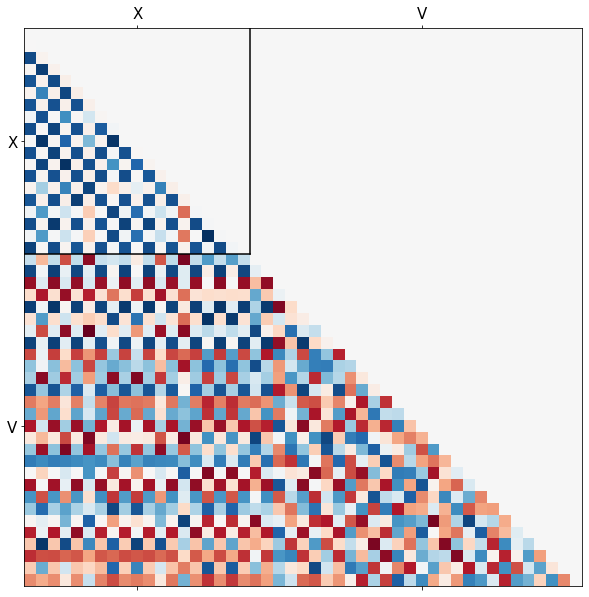

In [13]:
sampler3.plot_covcorr(threshold=0.0)

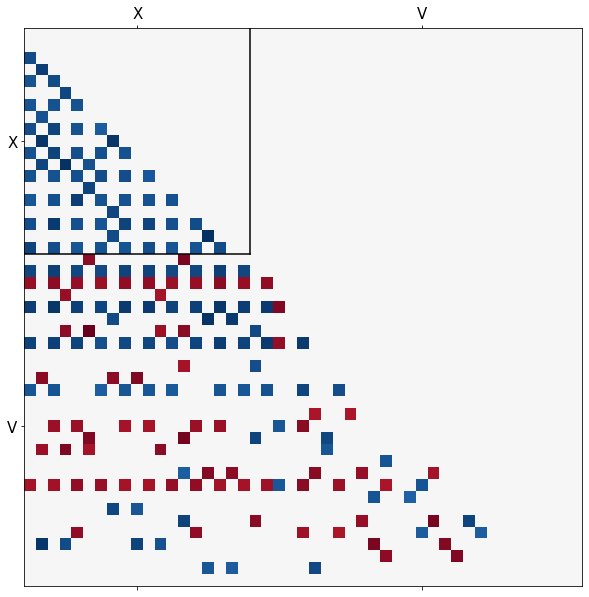

In [14]:
sampler3.plot_covcorr(threshold=0.8)

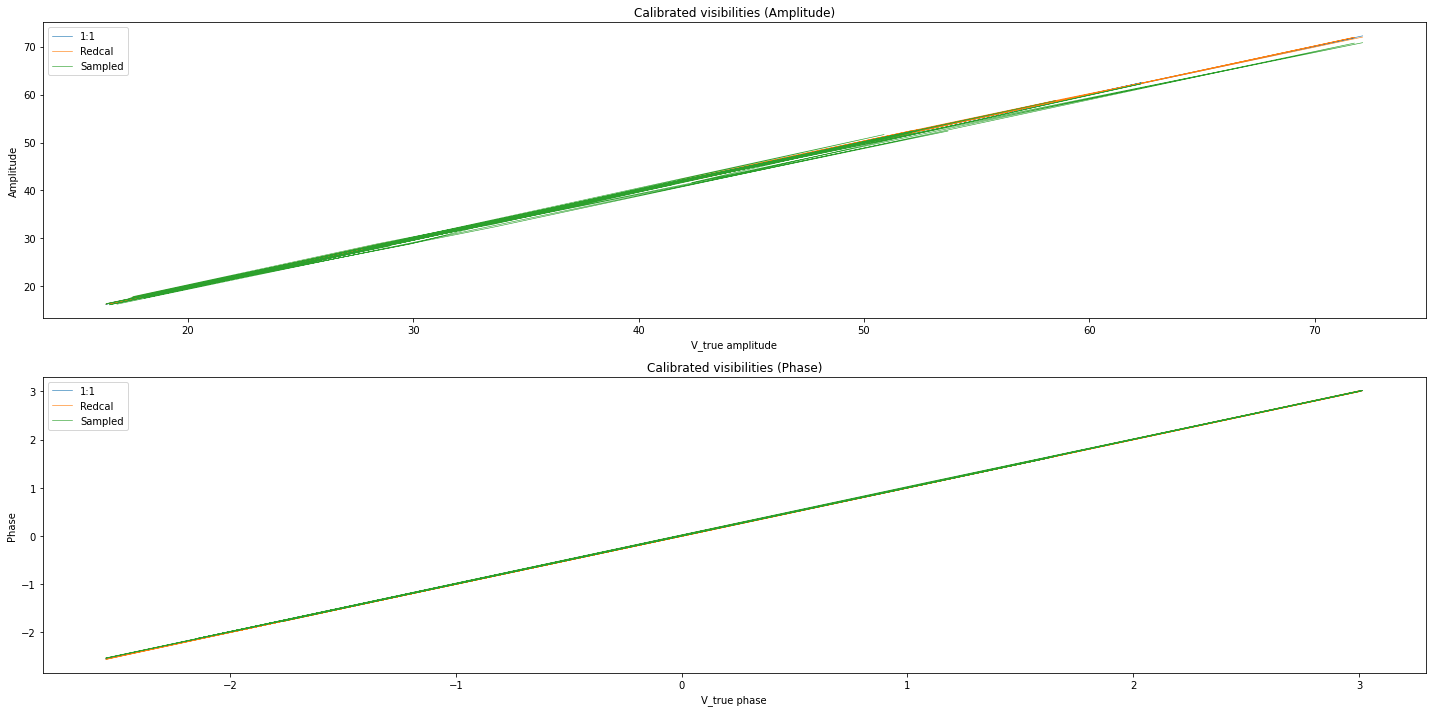

In [15]:
sampler3.plot_results()

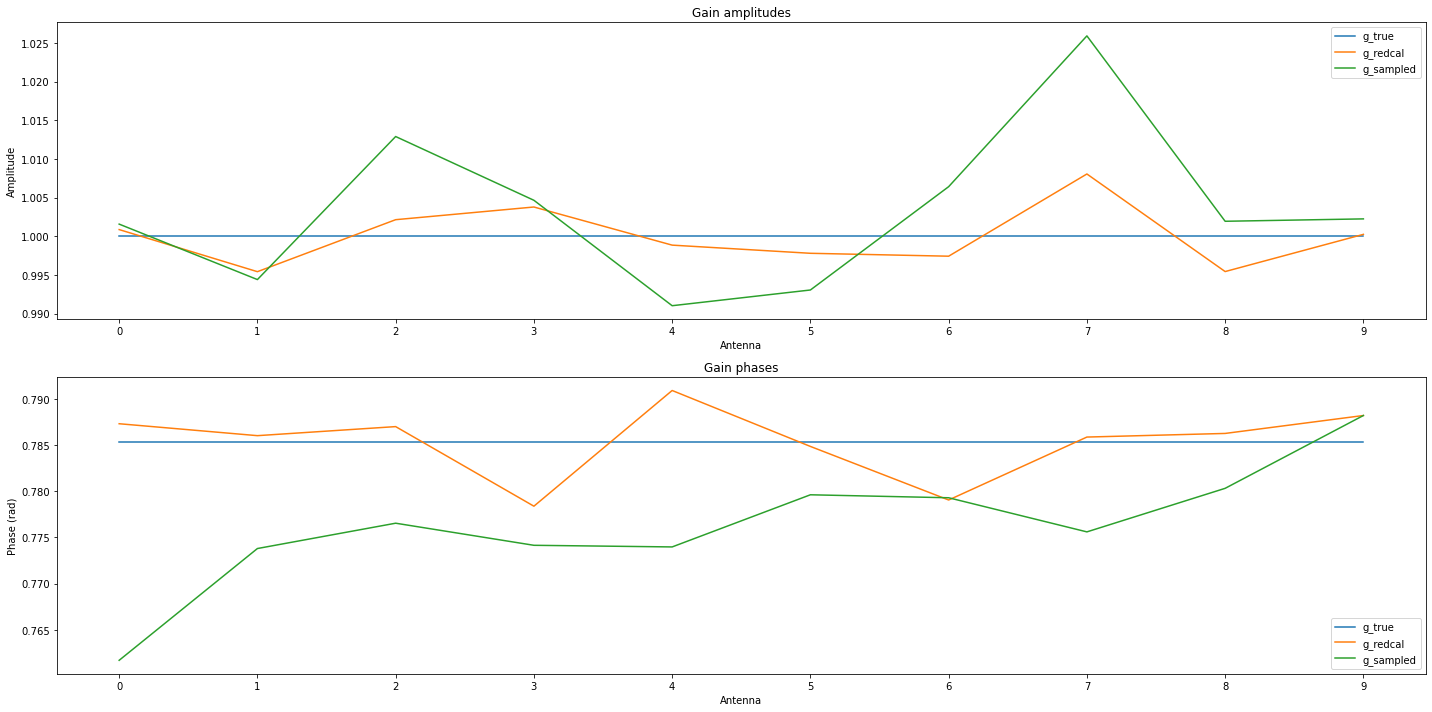

In [16]:
sampler3.plot_gains()

## 4. Different file

In [17]:
sampler4 = Sampler(seed=99, niter=10000, random_the_long_way=False)
sampler4.load_nr_sim("/scratch3/users/hgarsden/catall/calibration_points/viscatBC_outlier7_1.1", 
                    freq=9, time=9, remove_redundancy=True, initial_solve_for_x=False)

S = np.eye(sampler4.nant()*2-1)*0.01
V_mean = sampler4.vis_sim.V_model
Cv = np.eye(V_mean.size*2)
sampler4.set_S_and_V_prior(S, V_mean, Cv)
start_time = time.time()
sampler4.run()
print("Run time", (time.time()-start_time)/60, "minutes")

Loading NR sim from /scratch3/users/hgarsden/catall/calibration_points/viscatBC_outlier7_1.1
Get V_obs from /scratch3/users/hgarsden/catall/calibration_points/viscatBC_outlier7_1.1_g.uvh5
Get model from /scratch3/users/hgarsden/catall/calibration_points/viscatBC_outlier7_1.1_g_cal_dict.npz


Telescope hera_sim is not in known_telescopes.


Get noise from /scratch3/users/hgarsden/catall/calibration_points/viscatBC_outlier7_1.1_nn.uvh5
Get gains from /scratch3/users/hgarsden/catall/calibration_points/viscatBC_outlier7_1.1_g_new.calfits
Get true model from /scratch3/users/hgarsden/catall/calibration_points/viscatBC_outlier7_1.1.uvh5
Get true gains from /scratch3/users/hgarsden/catall/calibration_points/viscatBC_outlier7_1.1.calfits


Telescope hera_sim is not in known_telescopes.
telescope_location is not set. Using known values for HERA.
antenna_positions is not set. Using known values for HERA.
Telescope hera_sim is not in known_telescopes.
telescope_location is not set. Using known values for HERA.
antenna_positions is not set. Using known values for HERA.
Telescope hera_sim is not in known_telescopes.


Get V_obs from /scratch3/users/hgarsden/catall/calibration_points/viscatBC_outlier7_1.1_g.uvh5
Running sampling
Run time 0.9088187416394552 minutes


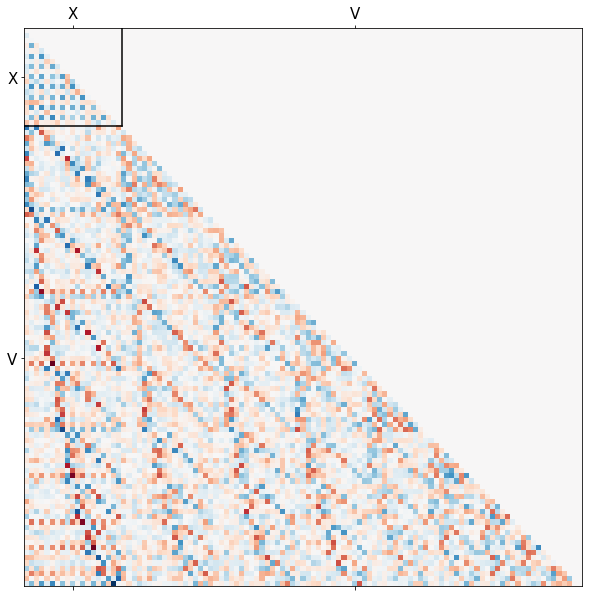

In [19]:
sampler4.plot_covcorr(threshold=0.0)

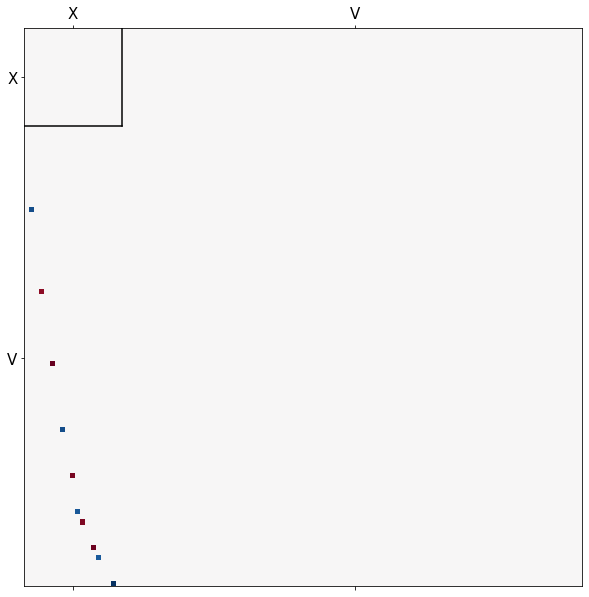

In [20]:
sampler4.plot_covcorr(threshold=0.8)

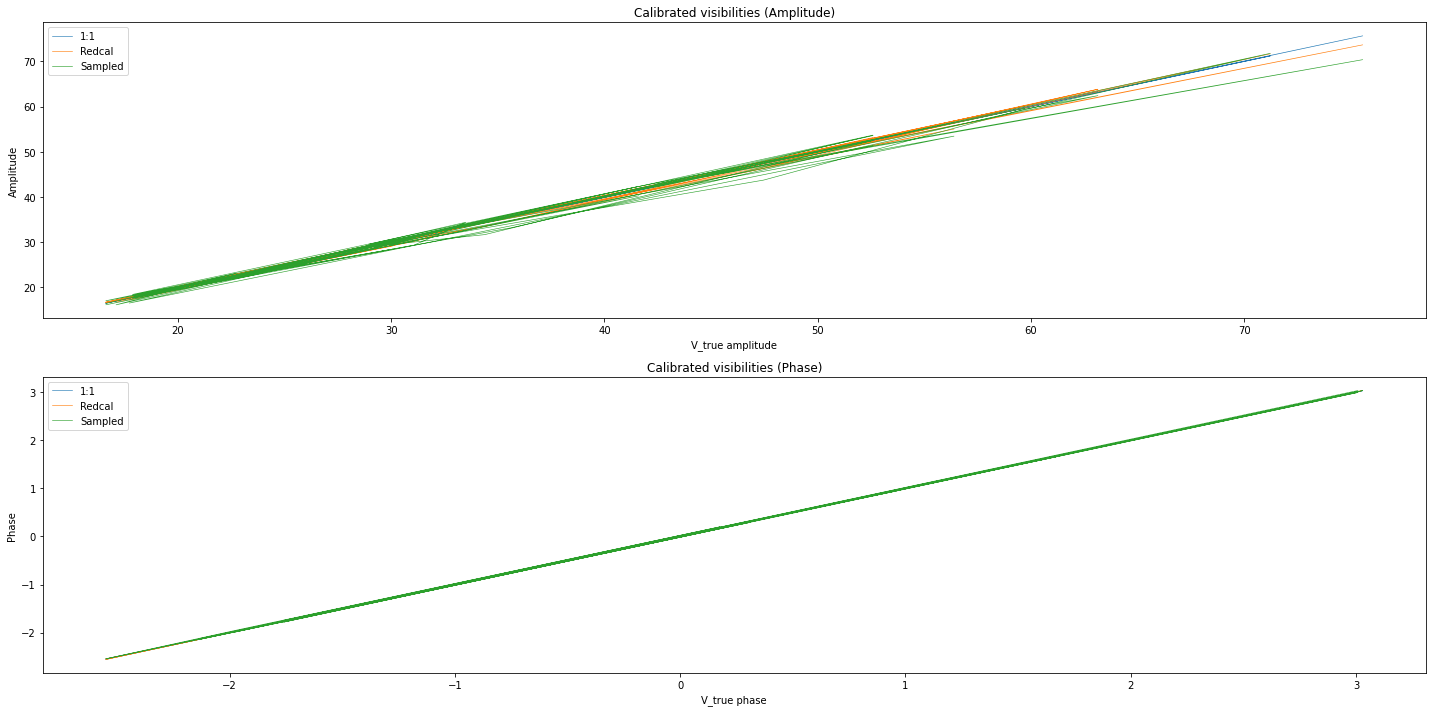

In [21]:
sampler4.plot_results()

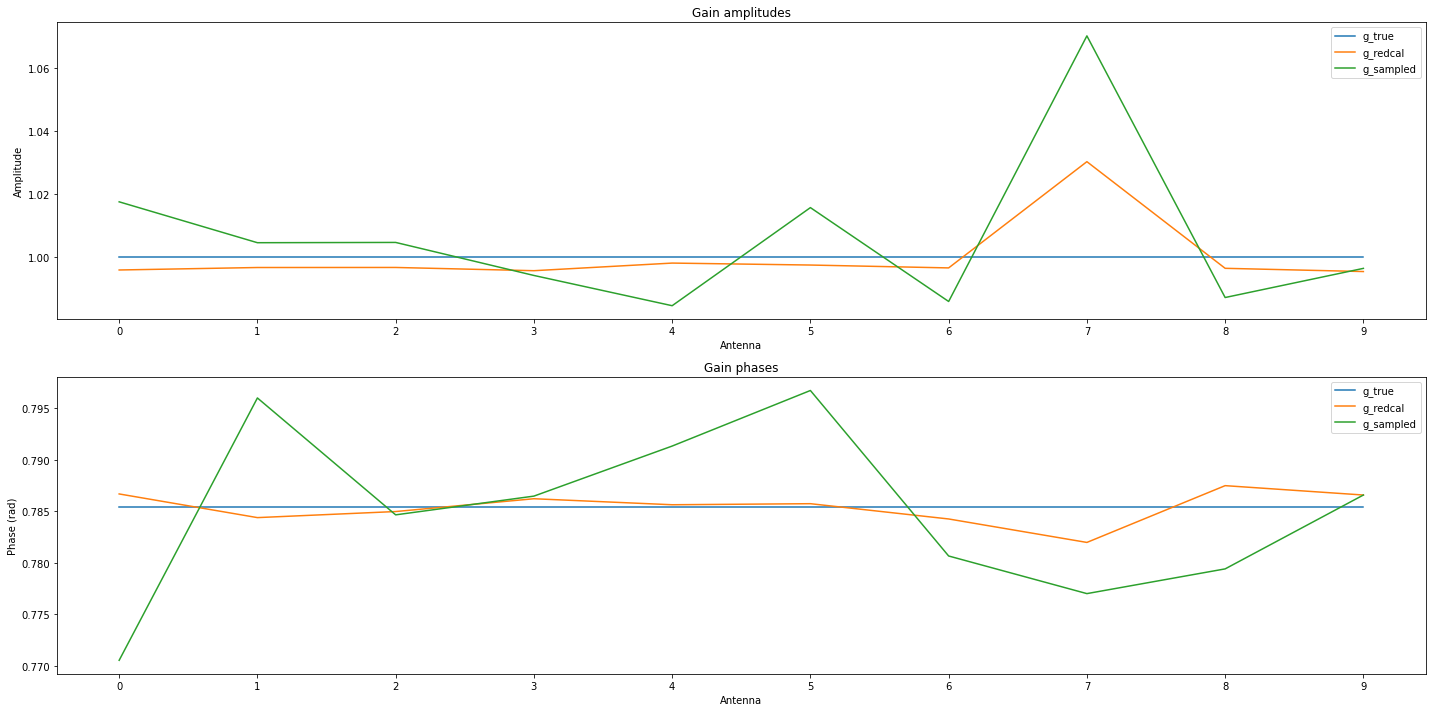

In [23]:
sampler4.plot_gains()

In [28]:
sampler5 = Sampler(seed=99, niter=10000, random_the_long_way=False)
sampler5.load_nr_sim("/scratch3/users/hgarsden/catall/calibration_points/viscatBC_outlier7_1.1", 
                    freq=9, time=9, remove_redundancy=False, initial_solve_for_x=False)

S = np.eye(sampler5.nant()*2-1)*0.01
V_mean = sampler5.vis_sim.V_model
Cv = np.eye(V_mean.size*2)
sampler5.set_S_and_V_prior(S, V_mean, Cv)
start_time = time.time()
sampler5.run()
print("Run time", (time.time()-start_time)/60, "minutes")

Loading NR sim from /scratch3/users/hgarsden/catall/calibration_points/viscatBC_outlier7_1.1
Get V_obs from /scratch3/users/hgarsden/catall/calibration_points/viscatBC_outlier7_1.1_g.uvh5
Get model from /scratch3/users/hgarsden/catall/calibration_points/viscatBC_outlier7_1.1_g_cal_dict.npz


Telescope hera_sim is not in known_telescopes.


Get noise from /scratch3/users/hgarsden/catall/calibration_points/viscatBC_outlier7_1.1_nn.uvh5
Get gains from /scratch3/users/hgarsden/catall/calibration_points/viscatBC_outlier7_1.1_g_new.calfits
Get true model from /scratch3/users/hgarsden/catall/calibration_points/viscatBC_outlier7_1.1.uvh5
Get true gains from /scratch3/users/hgarsden/catall/calibration_points/viscatBC_outlier7_1.1.calfits
Get V_obs from /scratch3/users/hgarsden/catall/calibration_points/viscatBC_outlier7_1.1_g.uvh5
Running sampling


Telescope hera_sim is not in known_telescopes.
telescope_location is not set. Using known values for HERA.
antenna_positions is not set. Using known values for HERA.
Telescope hera_sim is not in known_telescopes.
telescope_location is not set. Using known values for HERA.
antenna_positions is not set. Using known values for HERA.
Telescope hera_sim is not in known_telescopes.


Run time 0.6540589531262716 minutes


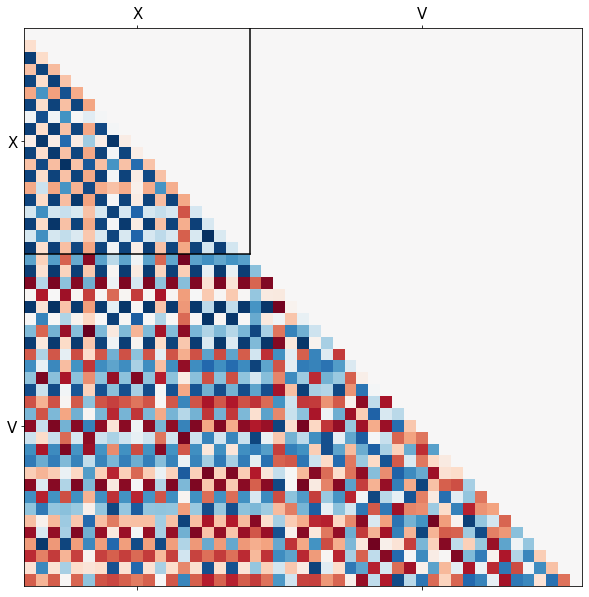

In [29]:
sampler5.plot_covcorr(threshold=0.0)

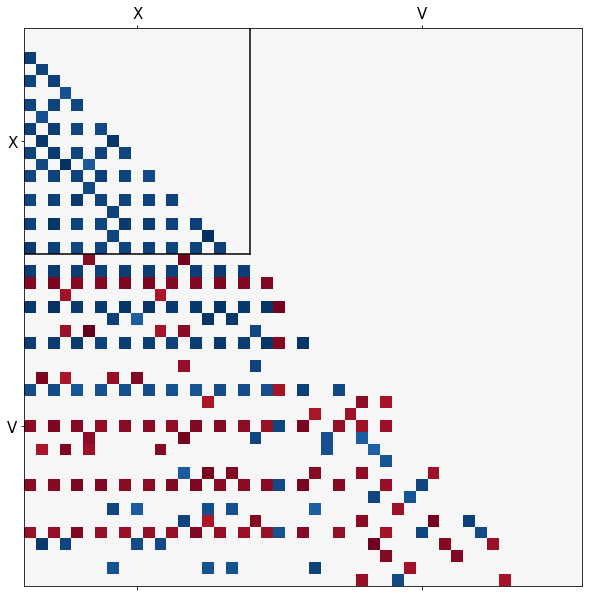

In [30]:
sampler5.plot_covcorr(threshold=0.8)

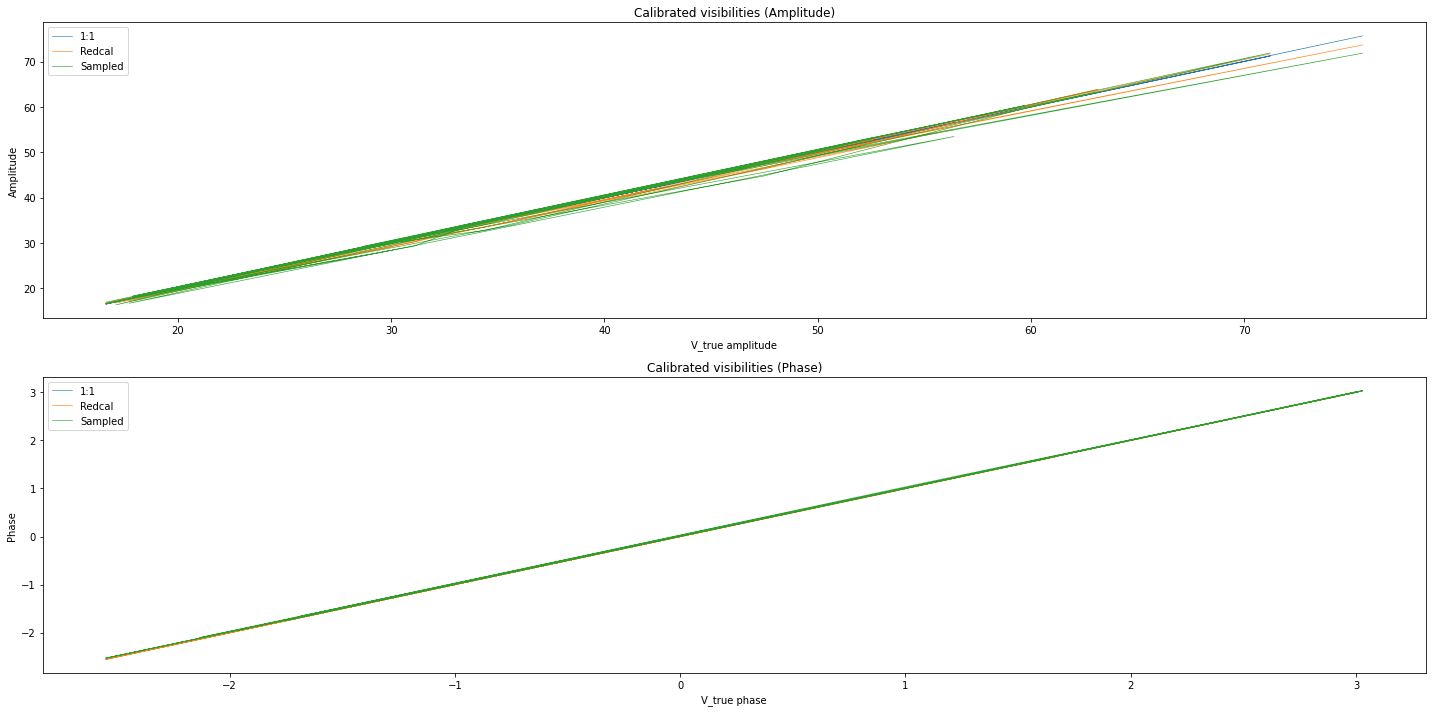

In [31]:
sampler5.plot_results()

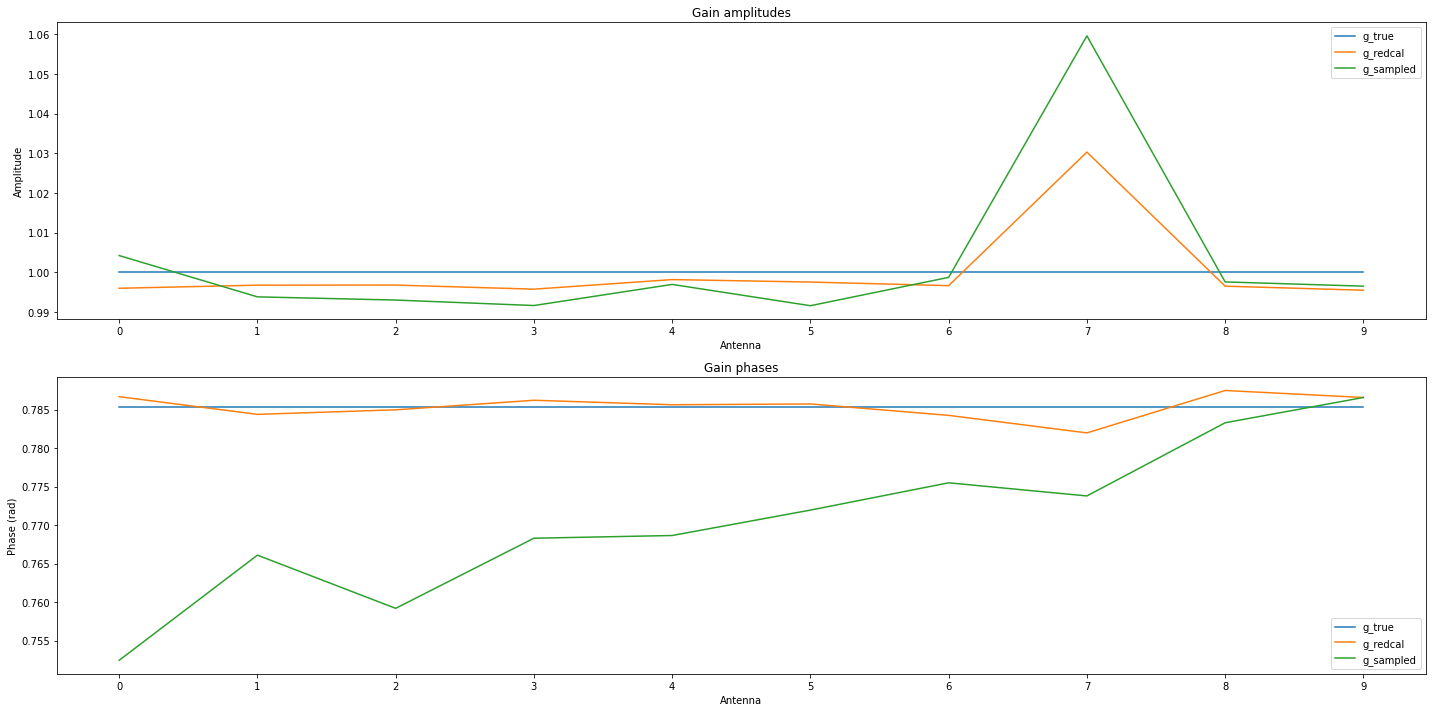

In [32]:
sampler5.plot_gains()
# Why doesn't the Vmodel pick up the bad antenna. Is there enough information for it to do this.
# Make the colors all the same.